# Проектная работа

 ## Тема: Принятие решений в бизнесе на основе А/В-тестов

### Цели проекта:
- подготовить список гипотез для увеличения выручки интернет-магазина
- приоритизировать полученные гипотезы
- запустить A/B-тест и проанализировать результаты

### Описание проекта:
### Часть 1: 
 - Нам доступен файл `hypothesis.csv` с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort, которые хотим проверить на А/В тестах
 - Используя фраймворки ICE и RICE приоритизируем эти гипотезы
 
### Часть 2:
 - После проведения А/В-теста данные о заказах и визитах пользователей из обоих групп собрали в два файла `orders.csv` и `visitors.csv`
 - Проведем анализ данных, изучим статистическую значимость изменений среднего чека и количества заказов в группе В относительно группы А
 - Примем решение о результате А/В-таста и сформулируем итоговые выводы
 
 

In [1]:
# импортируем библиотеки, которые могут быть использованы в дальнейшем анализе
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

# Часть 1

### 1. Откроем файлы с данными и изучим общую информацию

In [2]:
# функция, которая выдает основную информацию о датафрейме
def info_df(data):
    display(
          data.info(),  
          data.isna().sum(), 
          data.duplicated().sum()
         ) 

In [3]:
# данные о гипотезах сохраним в ДФ hypothesis
hypothesis = pd.read_csv('/Users/uliabubnova/Downloads/hypothesis.csv')

# выведем ДФ
display(hypothesis)

# выведем общую информацию о ДФ, наличие пропусков и дубликатов
info_df(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

0

In [5]:
# приведем все названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()        

In [6]:
# выведем все гипотезы, чтобы видеть точные формулировки
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

### 2. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
# расчитаем показатель ICE и отсортируем ДФ по убывавнию
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis_sort = hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending = False)
display(hypothesis_sort)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Первый метод ICE выделил наиболее перспективными 3 гипотезы: 8, 0 и 7.
Действительно при средних трудозатратах на внедрение, скидка на день рождения является сущетсвенным аргументом для совершения покупки. Неудивительно, что по ICE эта гипотиза самая приоритетная

### 3. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [8]:
# расчитаем показатель RICE и отсортируем ДФ по убывавнию
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis_sort = hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending = False)
pd.set_option('display.max_colwidth', 0)
display(hypothesis_sort)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Второй метод RICE выделил перспективными 4 гипотезы, но приоритеты сменились: 7, 2, 0 и 6, так как теперь мы учитываем охват аудитории

In [9]:
display(hypothesis.sort_values(by='RICE', ascending = False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


## Вывод Часть 1:

 - Оба фраймворка ICE и  RICE выделили примерно одинаковые наиболее приоритетные гипотезы. Но их приоретет меняется в зависимости от выбранного метода оценки, ведь при расчете RICE мы еще учитываем охват аудитории на которую повлияет нововведения
 - По методу RICE первостепенной стала гипотеза `Добавить форму подписки на все основные страницы....`, именно так мы можем охватить максимальоне количество пользователей и пополнить базу клиентов при средних вложениях. Эта гипотиза первая по приоритету.
 - Самой приоритетной гипотезой по ICE является гипотиза `Скидка именнинику...`, хоть на конкретного клиента она влияет достаточно сильно, но охват аудитории при этом совсем небольшой (RICE у нее ближе к нижней границе).
 - `Добавление блоков рекомендаций на сайт..` тоже охватывает большее количество посетителей, поэтому RICE достаточно высок, но влияние на пользователей не столь сильно. Ее нет смысла тестировать в первую очередь тоже.
 - `Два новых канала привлечения клиентов...` требует вложения значительных ресурсов и охватит дополнительно 30% потенциальных клиентов - RICE и ICE достаточно высоки, но все же не максимальны
 - `Добавить актуальные акции на сайт...` несложно, примерно половина пользователей обратят на них в нимание, но только части из них это будет полезно. Охват и влияние не очень большие, следовательно RICE средний
 
  

# Часть 2

### 1. Загрузим и проанализируем данные и количестве пользователей и заказах, полученные во время А/В-теста

In [10]:
# данные о заказах сохраним в ДФ orders
try:
    orders = pd.read_csv('/Users/uliabubnova/Downloads/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
# выведем первые 5 строк ДФ
display(orders.head())

# выведем общую информацию о ДФ, наличие пропусков и дубликатов
info_df(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

0

- В файле 1197 записей о заказах, дубликатов и пропусков нет
- Привести все названия столбцов к нижнему регистру
- Необходимо изменить тип данных столбца `date`
- Также необходимо проверить нет ли пользователей, которые случайно попали в обе группы

In [11]:
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

# сгруппируем ДФ по пользователю и найдем количество уникальных групп у каждого
orders_grouped = orders.groupby('visitor_id').agg({'group':'nunique'})

# узнаем сколько пользователей имеют несколько групп одновременно
users_id_wrong = orders_grouped.query('group >1').index
len(users_id_wrong)

58

Таких пользователей около 0.5% - их легко можно удалить, это не повлияет на информативность данных

In [12]:
orders = orders.query('visitor_id not in @users_id_wrong')

In [13]:
orders.shape

(1016, 5)

In [14]:
# данные о ежедневном количестве пользователей сохраним в ДФ visitors
try:
    visitors = pd.read_csv('/Users/uliabubnova/Downloads/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
# выведем первые 5 строк ДФ
display(visitors.head())

# выведем общую информацию о ДФ, наличие пропусков и дубликатов
info_df(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

date        0
group       0
visitors    0
dtype: int64

0

- В ДФ 62 строки, то есть тест проводили на протяжении месяца
- Необходимо поменять тип данных столбца `date`
- Стоит проверить сколько дней тестировали каждую гипотезу, чтобы убедиться, что данные за все дни сохранены, для каждой группы

In [15]:
print(visitors['group'].unique())
visitors.query('group == "A"')['group'].count()

['A' 'B']


31

Видим, что данные корректны, имеются сведения за весь месяц по обеим гипотезам

Теперь изменим тип данных `date` в обоих ДФ

In [16]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### 2. Построим график кумулятивной выручки по группам

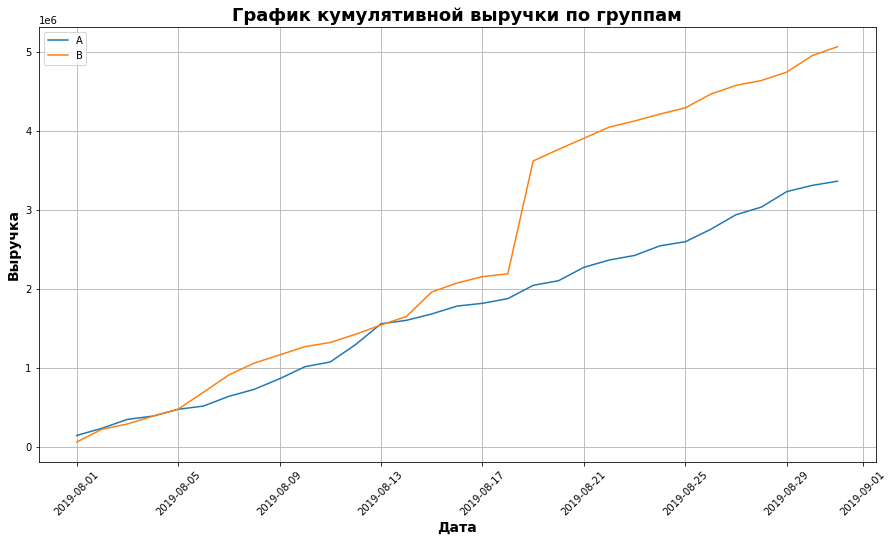

In [17]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize = (15, 8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)
plt.title('График кумулятивной выручки по группам', fontsize=18, fontweight="bold")
plt.xlabel("Дата", fontsize=14, fontweight="bold")
plt.ylabel("Выручка", fontsize=14, fontweight="bold")
plt.grid()
plt.legend();

 - 17 дней обе группы показывали прммерно одинаковые суммы выручки (выручка росла линейно день ото дня), периодически немного лидировала группа В
 - На 18 день был резкий скачок в группе В, и затем это лидерство сохранилось до конца эксперимента. Скорее всего в этот день были какие-то аномально высокие продажи (если это так, то в дальнейшем необходимо будет избавиться от аномалий и оценить результат теста без них)

### 3. Построим график кумулятивного среднего чека по группам. 

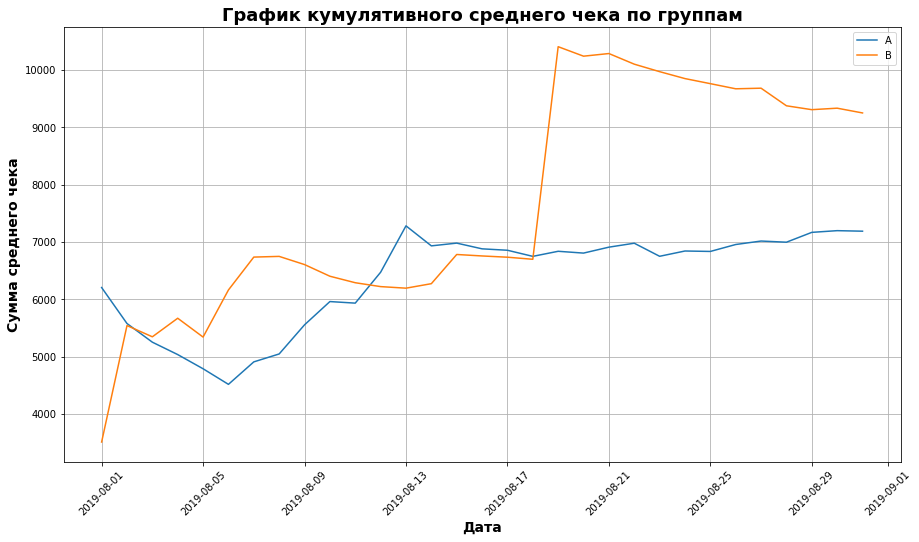

In [18]:
plt.figure(figsize = (15, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.title('График кумулятивного среднего чека по группам', fontsize=18, fontweight="bold")
plt.xlabel("Дата", fontsize=14, fontweight="bold")
plt.ylabel("Сумма среднего чека", fontsize=14, fontweight="bold")
plt.grid()
plt.legend();

- Первые пару дней эксперимента кумулятивные средние чеки в обеих группах колебались
- Примерно через 2 недели в группе А средний чек стабилизировался в районе 7000 руб
- В группе В на 18 день был резкий скачок среднего чека, который сильно повлиял на метрику. Кумулятивный средний чек с 7 тр за один день резко подскачил на 50%. Это еще раз подтверждает мысль, что в этот день был сверхдорогой заказ (аномалный выброс в данных)

### 4. Построим график относительного изменения кумулятивного среднего чека группы B к группе A

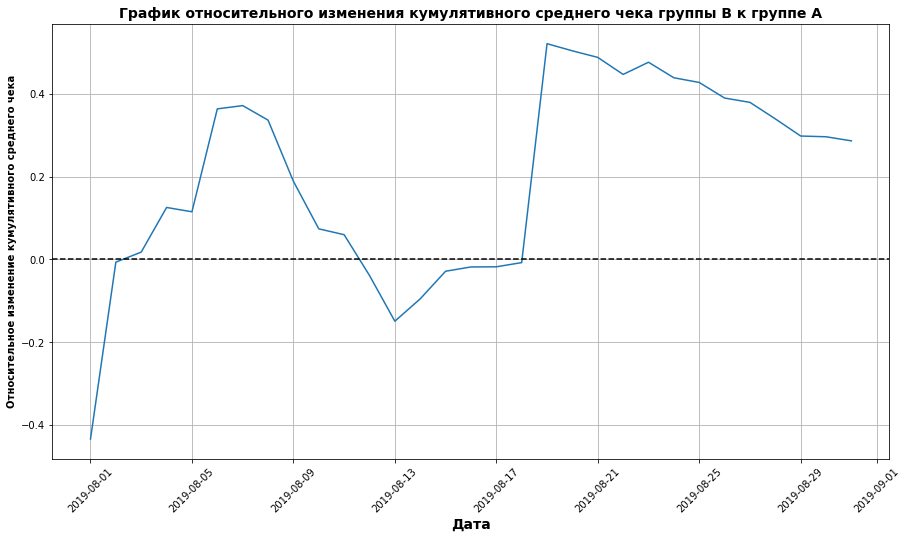

In [19]:
mergedCumulativeRevenue = cumulativeRevenueA.\
                          merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (15,8))
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation = 45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14, fontweight="bold")
plt.xlabel("Дата", fontsize=14, fontweight="bold")
plt.ylabel("Относительное изменение кумулятивного среднего чека", fontsize=10, fontweight="bold")
plt.grid()
plt.show();

- Кумулятивный средний чек в группе В колебался относительно кумулятивного среднего чека группы А (но на протяжении всего эксперемента все же чаще бы больше)
- Максимальный скачок был в день, когда была аномально большая выручка

### 5. Построим график кумулятивного среднего количества заказов на посетителя по группам

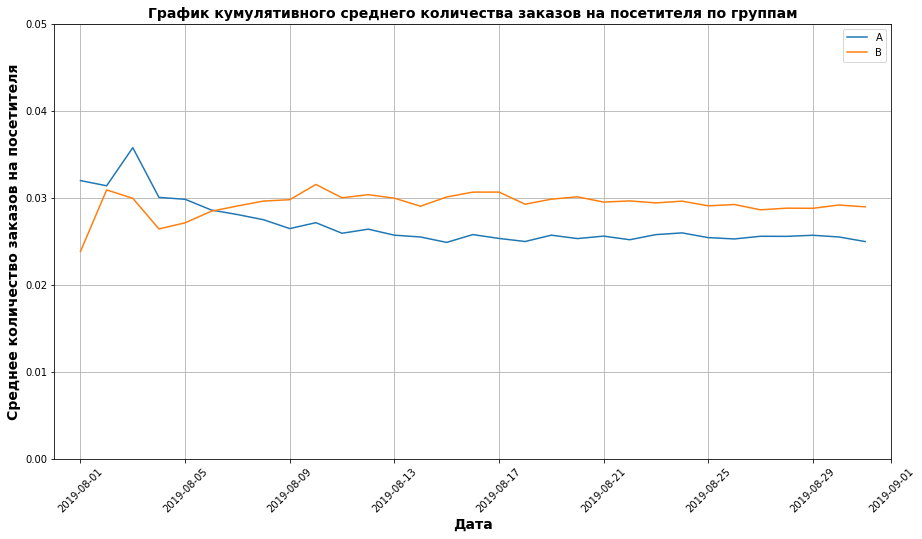

In [20]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize = (15, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0, 0.05])
plt.xticks(rotation = 45)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14, fontweight="bold")
plt.xlabel("Дата", fontsize=14, fontweight="bold")
plt.ylabel("Среднее количество заказов на посетителя", fontsize=14, fontweight="bold")
plt.grid()
plt.show();

- Среднее количество заказов на посетителя в группе В первые 5 дней была немного ниже, чем в группе А, но в дальнейшем оно повысиллсь на пол процента и до конца теста оставалось а районе 3%
- Среднее количество заказов на посетителя в группе А наоборот немного снизаилось (с 3-3.5% до 2.5%) и стабилизировалось на отметке в 2.5%
- Можно сказать, что по результатам эксмеримента в группе В среднее количество заказов на посетителя больше в сравнении с группой А

### 6. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

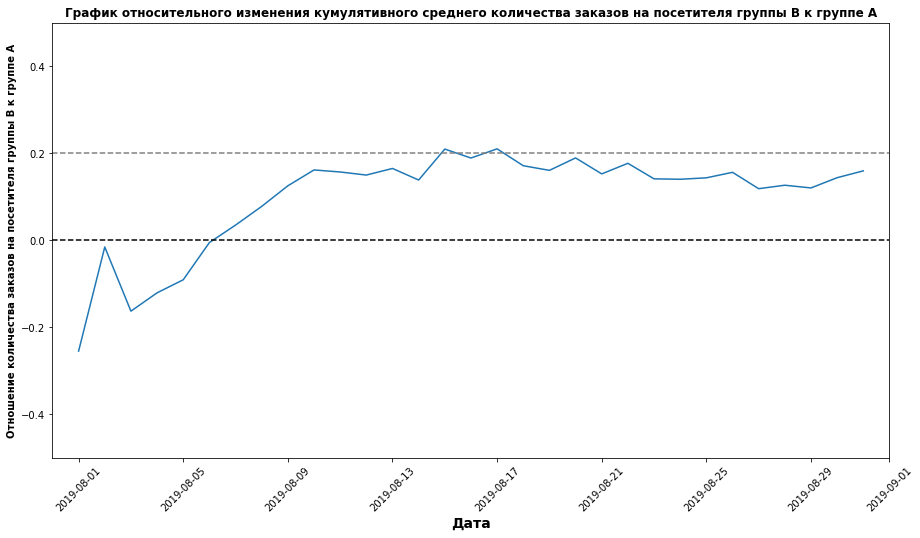

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (15, 8))

plt.plot(mergedCumulativeConversions['date'], \
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-07-31", '2019-09-01', -0.5, 0.5])
plt.xticks(rotation = 45)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontweight="bold")
plt.xlabel("Дата", fontsize=14, fontweight="bold")
plt.ylabel("Отношение количества заказов на посетителя группы В к группе А", fontsize=10, fontweight="bold")
plt.show();


- Через 10 дней после начала эксперемента конверсия в группе В стала на 18% больше, чем в группе А
- Далее график вибрирует, колеблется в районе 18%-20% и к окончаснию тестирования имеем положительный прирост конверсии в районе 17%-18%

 ### 7. Построим точечный график количества заказов по пользователям

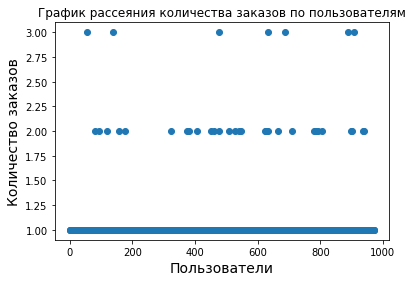

In [22]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График раcсеяния количества заказов по пользователям')
plt.xlabel("Пользователи", fontsize=14)
plt.ylabel("Количество заказов", fontsize=14)
plt.show();

- Большинство пользователей сделали 1 заказ за месяц
- Небольшое количество офрмили 2 заказа
- Буквально единицы совершили 3 покупки

### 8. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [23]:
np.percentile(ordersByUsers['orders'], [95, 99]) 

array([1., 2.])

- Только 1% пользователей совершили более 1 заказа
- Анамалией болем считать 2 и более заказов

### 9. Построим точечный график стоимостей заказов

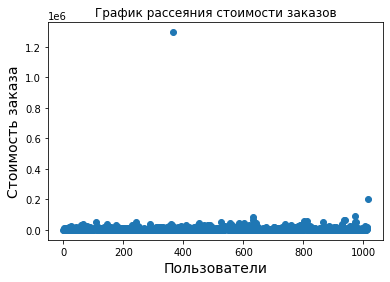

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('График раcсеяния стоимости заказов')
plt.xlabel("Пользователи", fontsize=14)
plt.ylabel("Стоимость заказа", fontsize=14)
plt.show();

- Вот и нашелся выброс, который дал скачок в кумулятивных метриках на 18-й день. Кто-то сделал один заказ на более, чем 1.2 млн руб
- В районе 200 000 руб виден еще один небольшой выброс - он скорее всего соответствует подъему на 5-6 день

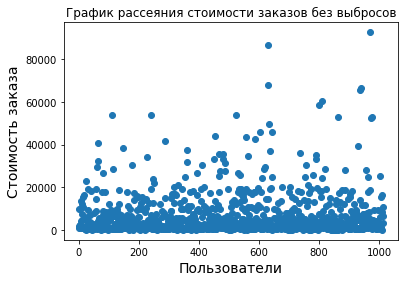

In [31]:
# построим график рассеяния без этих выбросов, то есть отберем заказы меньше 200 000 руб
orders_filtred  = orders.query('revenue < 200000')
x_values = pd.Series(range(0, len(orders_filtred['revenue'])))

plt.scatter(x_values, orders_filtred['revenue'])
plt.title('График раcсеяния стоимости заказов без выбросов')
plt.xlabel("Пользователи", fontsize=14)
plt.ylabel("Стоимость заказа", fontsize=14)
plt.show();

- видим, что большинство заказов не превышали 20 000 руб
- есть небольшое количество от 20 000 до 40 000 руб
- и единичные заказы свыше 40 000 руб

### 10. Посчитаем 95-й и 99-й перцентили стоимости заказов

In [26]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

 - Только 5% заказов привышали по стоимости 26785 руб
 - Всего 1% заказов были дороже 53904 руб

### 11. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем две гипотезы для сырых данных:
- Н0: Средние количество заказав на пользователя в группах А и В одинаковы
- Н1: Средние количество заказав на пользователя в группах А и В различны

Уровень статитстической значимости для этого теста установим в 5%

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Среднее количество заказоа на посетителя группы В выше на {0:.0%}, чем у группы А".format(sampleB.mean() / sampleA.mean() - 1))
 

p-value = 0.011
Среднее количество заказоа на посетителя группы В выше на 16%, чем у группы А


p-value около 1%, что меньше нашего принятого допуска в 5%. Значит у нас есть все основания отвергнуть нулевую гипотезу Н0.

Вывод: мы получили статистичеки значивмые различия в 16% между конверсиями групп В и А

### 12.  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем две гипотезы для сырых данных:
- Н0: Средние чеки в группах А и В одинаковые
- Н1: Средние чеки в группах А и В различны

Уровень статитстической значимости для этого теста установим в 5%

In [28]:
print('p-value = {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Средний чек в группе В выше на {0:.1%}, чем в группе А'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value = 0.829
Средний чек в группе В выше на 28.7%, чем в группе А


p-value во много раз превышает принятый нами порог в 5%. То есть у нас нет оснований, чтобы отвергнуть нулевую гипотезу Н0.

Вывод: не смотря, на то, что средний чек в группе В больше почти на треть, но тест не показал статичтически значимых различий

### 13. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Чтобы очистить данные, избавимся от аномалий.
Так как мы знаем, что не более 1% пользователей сделали больше одного заказа и эти заказы в 95% были дешевле 26700 руб, а 99% были дешевле 54000 руб.

Поэтому примем за аномальные выбросы следующие значения:
- 2 и более заказа
- чек заказа больше 50 000 руб

Сформулируем две гипотезы для очищенных данных:

- Н0: При очищенных данных средние количества заказав на пользователя в группах А и В одинаковы 
- Н1: При очищенных данных средние количества заказав на пользователя в группах А и В различны

Уровень статитстической значимости для этого теста установим в 5%

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-value = {0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Среднее количество заказоа на посетителя группы В выше на {0:.0%}, чем у группы А'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.00728
Среднее количество заказоа на посетителя группы В выше на 19%, чем у группы А


На очищенных данных опять получили статистически значимые различия в среднем количестве заказов на посетителя. Есть все основания отвергнуть нулевую гипотезу Н0.

### 14.  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем две гипотезы для очищенных данных:

- Н0: Средние чеки в группах А и В при очищенных данных одинаковые
- Н1: Средние чеки в группах А и В при очищенных данных различны

Уровень статитстической значимости для этого теста установим в 5%

In [30]:
print(
    'p-value = {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Средний чек в группе В выше на {0:.1%}, чем в группе А".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.964
Средний чек в группе В выше на 2.8%, чем в группе А


А вот разность средних чеков опять не подтвердилась, оставляем Н0. Средний чек группы В при удалении выбросов всего на 2.8% больше.

# Выводы:

- График различия среднего чека колеблется, есть момент резкого скачка, котрый указывает на возможное наличие аномалий в данных.
- График различия среднее количества заказов на посетителя между группами А и В показывает, что в группе В этот показатель выше на протяжение всего теста и стабилизировлся на уровне 18-19%
- Мы получили статистически значимое различие по среднему количеству заказов на посетителя между группами А и В как по сырым, так и очищенным данным. Среднее количество заказоа на посетителя группы В больше на 19%
- Статистически значимого различия по среднему чеку между группами А и В нет как с аномалиями, так и без них. После удаления выбросовов, средний чек групы В больше всего на 2.8%

## Итоговое решение:
Тест останавливаем и считаем его успешным. Гипотеза В позволила увеличить среднее количество заказоа на посетителя примерно на 19%, при сохранение суммы среднего чека, как в группе А